In [1]:
# Constants
w = 1e3       # seconds^-1
R1 = R3 = R5 = 1000.  # ohms
R2 = R4 = R6 = 2000.  # ohms
inductor = False
if inductor:
    L = 2.    # henry
    R6 = complex(0, w*L)
C1 = 1e-6     # farads
C2 = .5e-6    # farads
xp = 3        # volts

In [2]:
from numpy import array

# matrix entries
a1 = complex(1/R1 + 1/R4, w*C1)
b1 = complex(0, -w*C1)
c1 = complex(0, 0)

a2 = complex(0, -w*C1)
b2 = complex(1/R2 + 1/R5, w*(C1 + C2))
c2 = complex(0, -w*C2)

a3 = complex(0, 0)
b3 = complex(0, -w*C2)
c3 = complex(1/R3 + 1/R6, w*C2)

A = array([[a1, b1, c1], [a2, b2, c2], [a3, b3, c3]], dtype=complex)
v = array([xp/R1, xp/R2, xp/R3], dtype=complex)

In [3]:
from SolvePartial import PartialPivot
from cmath import polar
from numpy import linspace, pi, exp

V = PartialPivot(A, v)
r1, th1 = polar(V[0])
r2, th2 = polar(V[1])
r3, th3 = polar(V[2])

t = linspace(0, 6*pi/w, 301)
V1 = (V[0]*exp(1j*w*t)).real
V2 = (V[1]*exp(1j*w*t)).real
V3 = (V[2]*exp(1j*w*t)).real

print('|V1| = {}, phase V1 = {}'.format(r1, th1))
print('|V2| = {}, phase V2 = {}'.format(r2, th2))
print('|V3| = {}, phase V3 = {}'.format(r3, th3))

|V1| = 1.7014390658777336, phase V1 = -0.09545371433271428
|V2| = 1.4806053465364062, phase V2 = 0.20216879328855675
|V3| = 1.8607693200562132, phase V3 = -0.07268725004282395


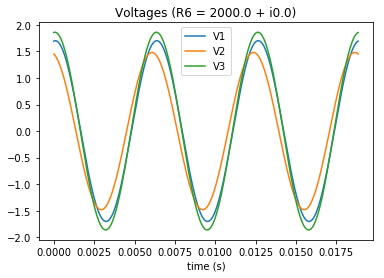

In [5]:
from pylab import figure, plot, xlabel, title, legend, show

figure(1)
plot(t, V1, t, V2, t, V3)
xlabel('time (s)')
title('Voltages (R6 = {} + i{})'.format(R6.real, R6.imag))
legend(('V1', 'V2', 'V3'))
show()